In [46]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
import sklearn.metrics

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import time
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')












In [47]:
# read the glass dataset
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",
                # names =('Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass'))

In [48]:
#Map the labels to the ordinal numbers
#df['glass']=df['glass'].replace({1:"bld_float",2:"bld_non",3:"veh_float",5:"container",6:"tableware",7:"headlamps"})

In [49]:
# Obtain the class distribution
#df['glass'].value_counts()

In [50]:
# Train, test split
#X = df.drop(['glass'],axis=1)
#y = df['glass']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

data1 = pd.read_csv('ExtractedFeatures_standardized_InVitro_MonoB_Training.csv')

X = data1.drop('Label',axis=1)
y = data1['Label']
y1 = y.astype("category").cat.codes
data_dmatrix = xgb.DMatrix(data=X,label=y1,feature_names=X.columns)
#X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.30, random_state=101)


X_train = X #training data
y_train = y1 #training label
X_train
y_train



0       0
1       0
2       0
3       0
4       0
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Length: 5000, dtype: int8

In [51]:
data2 = pd.read_csv('ExtractedFeatures_standardized_InVitro_MonoB_Testing.csv')
X2 = data2.drop('Label',axis=1)
y2 = data2['Label']
y3 = y2.astype("category").cat.codes
data_dmatrix2 = xgb.DMatrix(data=X2,label=y3,feature_names=X2.columns)
X_test = X2 #testing data
y_test = y3 #testing label
X_test
y_test

0      0
1      0
2      0
3      0
4      0
      ..
995    4
996    4
997    4
998    4
999    4
Length: 1000, dtype: int8

In [52]:
#obtain class labels for future use 
classes = y.value_counts().index.tolist()
classes

['SPB', 'SAB', 'PAB', 'HFB', 'MCB']

In [53]:
# select classifiers 
#classifiers=[
#DecisionTreeClassifier(max_depth = 2),
#SVC(kernel = 'linear', C = 1),
#GaussianNB(),
#KNeighborsClassifier(n_neighbors = 7),
#LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')]
svc = SVC()
svc_opt = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
rfc = RandomForestClassifier(n_estimators=600)
rfc_opt = RandomForestClassifier(max_depth= 25,min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000)
params = { 'objective':'binary:logistic','max_depth': 4,'alpha': 10,'learning_rate': 1.0,'n_estimators':100 }         
xgb = XGBClassifier(**params)
#xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')
params2 = {'objective':'binary:logistic','max_depth': 6,'n_estimators': 500,'learning_rate': 0.1 }
xgb_opt = XGBClassifier(**params2)

classifiers=[svc,svc_opt,rfc,rfc_opt,xgb,xgb_opt]
#classifiers=[svc_opt]
classifiers

[SVC(),
 SVC(C=100, gamma=0.01),
 RandomForestClassifier(n_estimators=600),
 RandomForestClassifier(max_depth=25, n_estimators=1000),
 XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=1.0, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, random_state=None,
               reg_alpha=None, ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,


In [24]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [25]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

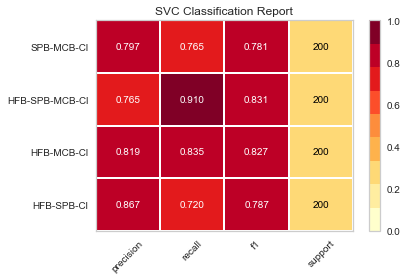

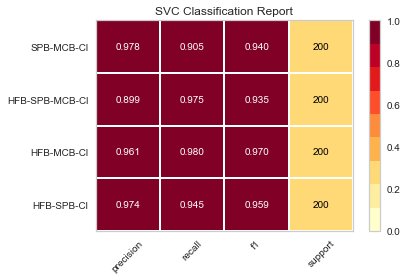

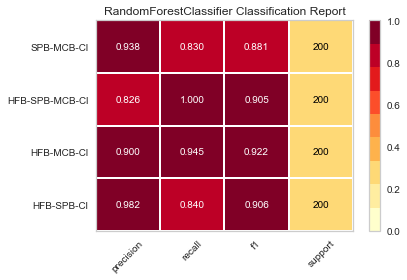

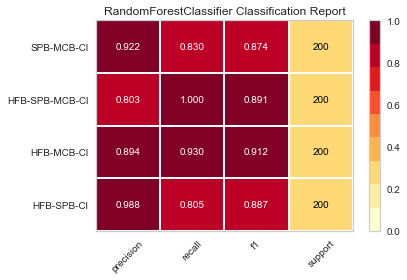

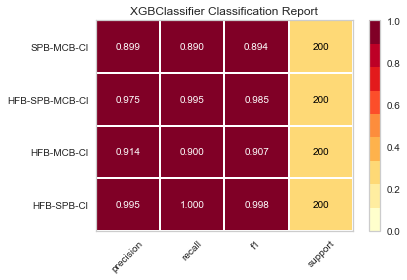

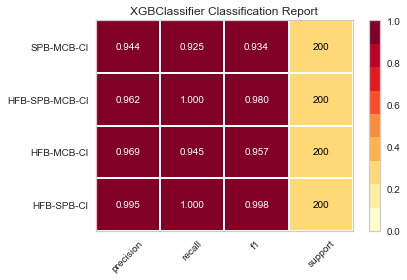

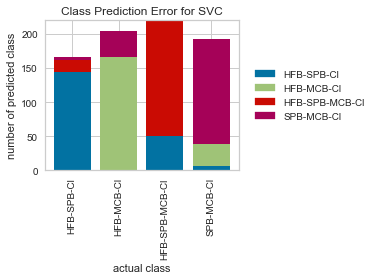

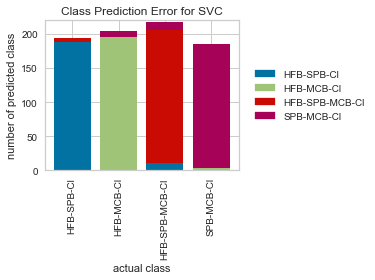

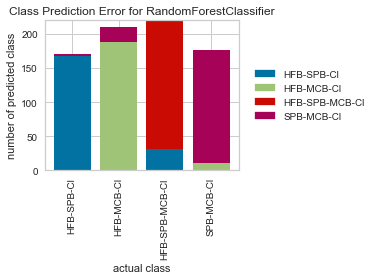

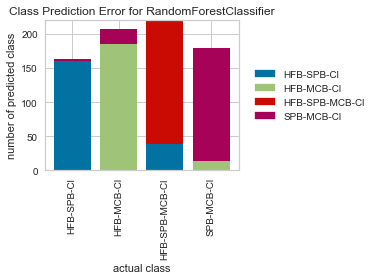

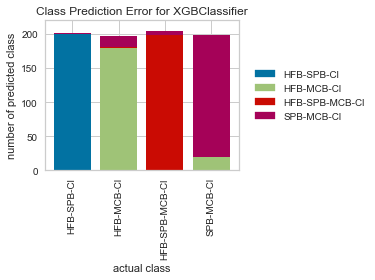

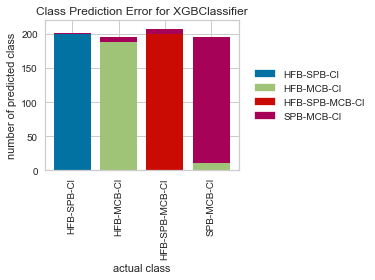

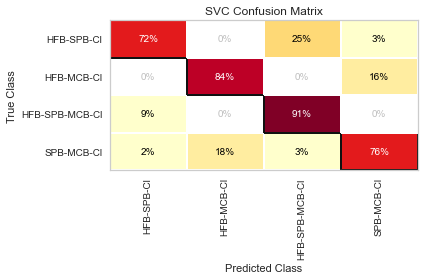

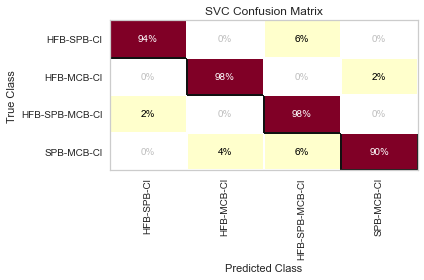

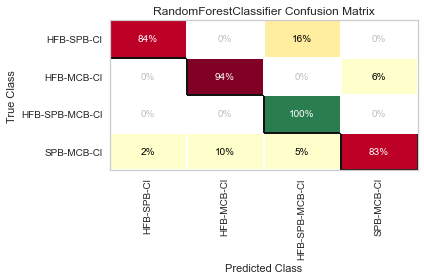

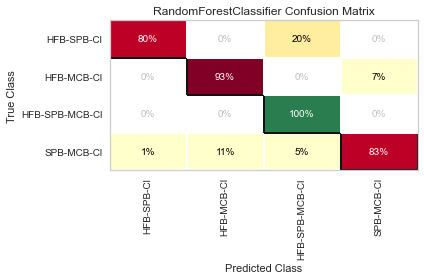

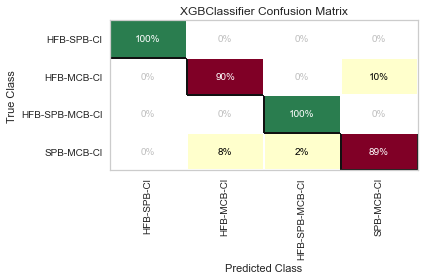

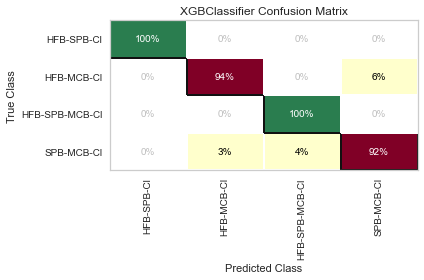

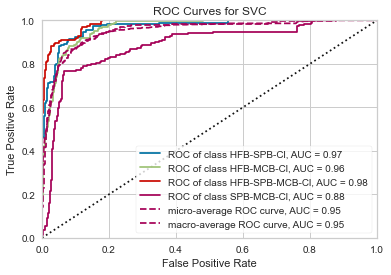

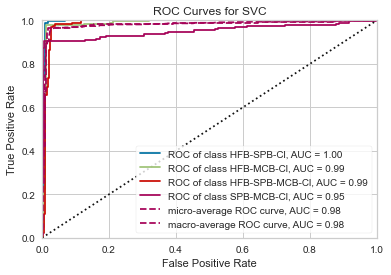

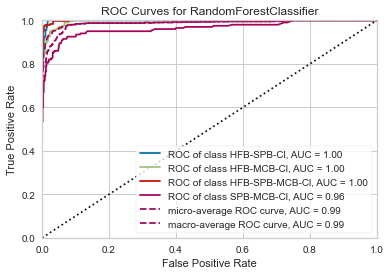

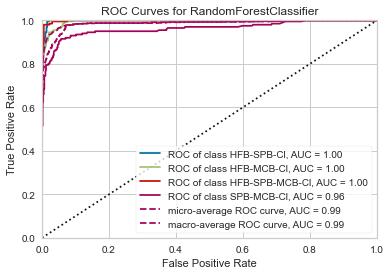

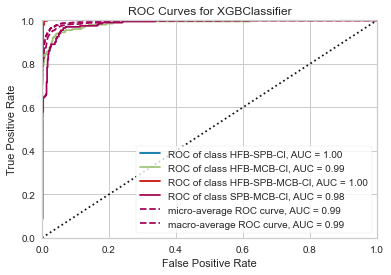

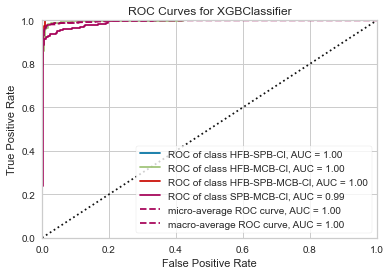

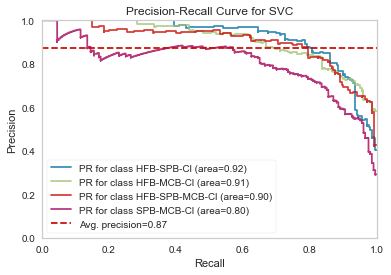

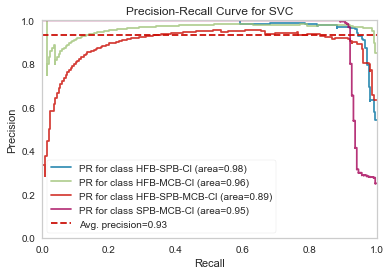

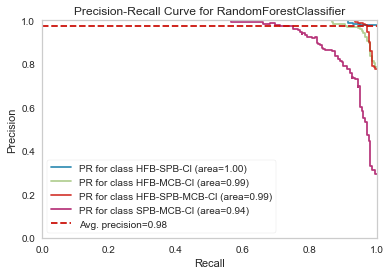

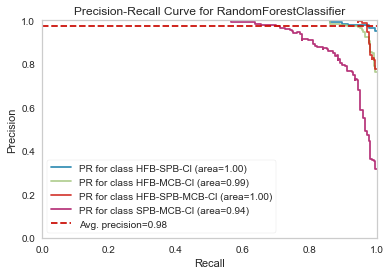

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

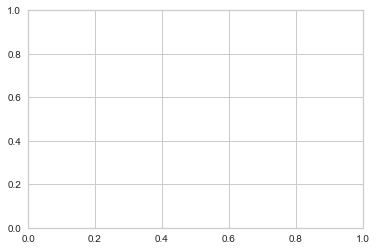

In [8]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]
#visualization =[CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [9]:
#Deploy aggregate metrics  
classifier_metrics()

SVC()
cohen_kappa_score: 0.743
log_loss: 0.000
zero_one_loss: 0.193
hemming_loss: 0.193
matthews_corrcoef: 0.745

------------------------------------------------------
SVC(C=100, gamma=0.01)
cohen_kappa_score: 0.935
log_loss: 0.000
zero_one_loss: 0.049
hemming_loss: 0.049
matthews_corrcoef: 0.936

------------------------------------------------------
RandomForestClassifier(n_estimators=600)
cohen_kappa_score: 0.857
log_loss: 0.374
zero_one_loss: 0.108
hemming_loss: 0.107
matthews_corrcoef: 0.861

------------------------------------------------------
RandomForestClassifier(max_depth=25, n_estimators=1000)
cohen_kappa_score: 0.850
log_loss: 0.375
zero_one_loss: 0.113
hemming_loss: 0.113
matthews_corrcoef: 0.854

------------------------------------------------------
XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
     

In [54]:
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table

In [55]:
# Generate the predictions for 6 classifiers
#rf_y = rf.predict(X_test)
#knn_y = knn.predict(X_test)

svc.fit(X_train,y_train)
svc_y = svc.predict(X_test)
svc_opt.fit(X_train,y_train)
svc_opt_y = svc_opt.predict(X_test)

rfc.fit(X_train,y_train)
rfc_y = rfc.predict(X_test)
rfc_opt.fit(X_train,y_train)
rfc_opt_y = rfc_opt.predict(X_test)

xgb.fit(X_train,y_train)
xgb_y = xgb.predict(X_test)
xgb_opt.fit(X_train,y_train)
xgb_opt_y = xgb_opt.predict(X_test)

In [56]:
#print("McNemar's test")
#chi2_, p = mcnemar_test(y_test, svc_y, svcopt_y)
#print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC and SVC optimized")
table = mcnemar_table(y_target=y_test, y_model1=svc_y, y_model2=svc_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC and RF")
table = mcnemar_table(y_target=y_test, y_model1=svc_y, y_model2=rfc_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC and RF optimized")
table = mcnemar_table(y_target=y_test, y_model1=svc_y, y_model2=rfc_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC and XGB")
table = mcnemar_table(y_target=y_test, y_model1=svc_y, y_model2=xgb_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC and XGB optimized")
table = mcnemar_table(y_target=y_test, y_model1=svc_y, y_model2=xgb_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC optimized and RF")
table = mcnemar_table(y_target=y_test, y_model1=svc_opt_y, y_model2=rfc_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC optimized and RF optimized")
table = mcnemar_table(y_target=y_test, y_model1=svc_opt_y, y_model2=rfc_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC optimized and XGB")
table = mcnemar_table(y_target=y_test, y_model1=svc_opt_y, y_model2=xgb_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for SVC optimized and XGB optimized")
table = mcnemar_table(y_target=y_test, y_model1=svc_opt_y, y_model2=xgb_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")


print("McNemar's test for RF and RF optimized")
table = mcnemar_table(y_target=y_test, y_model1=rfc_y, y_model2=rfc_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for RF and XGB")
table = mcnemar_table(y_target=y_test, y_model1=rfc_y, y_model2=xgb_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for RF and XGB optimized")
table = mcnemar_table(y_target=y_test, y_model1=rfc_y, y_model2=xgb_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")


print("McNemar's test for RF optimized and XGB")
table = mcnemar_table(y_target=y_test, y_model1=rfc_opt_y, y_model2=xgb_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for RF optimized and XGB optimized")
table = mcnemar_table(y_target=y_test, y_model1=rfc_opt_y, y_model2=xgb_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

print("McNemar's test for XGB and XGB optimized")
table = mcnemar_table(y_target=y_test, y_model1=xgb_y, y_model2=xgb_opt_y)
chi2_, p = mcnemar(ary=table, corrected=True)
print(f"chi² statistic: {chi2_}, p-value: {p}\n")

McNemar's test for SVC and SVC optimized
chi² statistic: 109.92366412213741, p-value: 1.0183786248339704e-25

McNemar's test for SVC and RF
chi² statistic: 59.18881118881119, p-value: 1.4324601940220295e-14

McNemar's test for SVC and RF optimized
chi² statistic: 59.18881118881119, p-value: 1.4324601940220295e-14

McNemar's test for SVC and XGB
chi² statistic: 28.05625, p-value: 1.1783992159509642e-07

McNemar's test for SVC and XGB optimized
chi² statistic: 72.66438356164383, p-value: 1.5368271746057256e-17

McNemar's test for SVC optimized and RF
chi² statistic: 7.147058823529412, p-value: 0.007508702485698824

McNemar's test for SVC optimized and RF optimized
chi² statistic: 7.147058823529412, p-value: 0.007508702485698824

McNemar's test for SVC optimized and XGB
chi² statistic: 20.641221374045802, p-value: 5.539057451725429e-06

McNemar's test for SVC optimized and XGB optimized
chi² statistic: 2.752688172043011, p-value: 0.0970910675964767

McNemar's test for RF and RF optimized
